前言：梯度上升是最大化似然函数，梯度下降是最小化损失函数，俩者更新参数W的公式取决于似然函数与损失函数的选取，但原理相同。

# 1 Logistic回归

假设现在有一些数据点，我们用一条直线对这些点进行拟合（该线称为最佳拟合直线），这个拟合过程就称作<font color=blue size=2 face="黑体">**回归**</font>。  
Logistic回归进行分类的主要思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。这里的“回归”一词源于最佳拟合，表示要找到最佳拟合参数集。训练分类器时的做法就是<font color=blue size=2 face="黑体">**寻找最佳拟合参数，使用的是最优化算法**</font>。

||Logistic回归的一般过程|
|:-|:-:|
|收集数据|采用任意方法收集数据|
|准备数据|由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳|
|分析数据|采用任意方法对数据进行分析|
|训练算法|大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数|
|测试算法|一旦训练步骤完成，分类将会很快|
|使用算法|首先，我们需要一些输入数据，并将其转换成对应的结构化数值；接着，基于训练好的回归系数就可以对这些数值进行简单的回归计算，判定它们属于哪个类别;在这之后，我们就可以在输出的类别上做一些其他分析工作|

## 1.1 基于Logistic回归和Sigmoid函数的分类

|Logistic回归||
|:-|:-|
|优点|计算代价不高，易于理解和实现|
|缺点|容易欠拟合，分类精度可能不高|
|适用数据类型|数值型和标称型数据|

想要的函数应该能接受所有的输入然后预测出类别。例如，在两个类的情况下，上述函数输出0或1。或许读者之前接触过具有这种性质的函数，该函数称为海维塞德阶跃函数（Heaviside step function），或者直接称为单位阶跃函数。问题在于：<font color=blue size=2 face="黑体">**该函数在跳跃点上从0瞬间跳跃到1，这个瞬间跳跃过程有时很难处理**</font>。幸好，另一个函数也有类似的性质，且数学上更易处理，这就是Sigmoid函数。Sigmoid函数具体的计算公式如下：
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

<center>
    <img src="./images/图5-1 俩种坐标尺度下的Sigmoid函数.jpg" height='40%' width="40%">
    <br>
    <div style="color:orange; border-bottom: 0.5px solid #d9d9d9;
    display: inline-block;
    color: #999;
    padding: 0.5px;">俩种坐标尺度下的Sigmoid函数</div>
</center>

为了实现Logistic回归分类器，我们可以在每个特征上乘以一个回归系数，然后把所有的结果值相加，将这个总和代入Sigmoid函数中，进而得到一个范围在0-1之间的数值。最后，结果大于0.5的数据被归入1类，小于0.5的即被归入0类。所以，Logistic回归也可以被看成是一种概率估计。确定了分类器的函数形式之后，现在的问题变成了：<font color=blue size=2 face="黑体">**最佳回归系数是多少？如何确定它们的大小？**</font>

## 1.2 基于最优化方法的最佳回归系数确定

Sigmoid函数的输入记为z，由下面公式得出：
$$ z=w_{0}x_{0}+w_{1}x_{1}+w_{2}x_{2}+...+w_{n}x_{n}$$  
如果采用向量的写法，上述公式可以写成$z=w^{T}x$。它表示将这两个数值向量的对应元素相乘然后全部加起来即得到z值。其中的向量x是分类器的输入数据，向量<font color=blue size=2 face="黑体">**w也就是我们要找到的最佳参数(系数)**</font>，从而使得分类尽可能地精确。为了寻找该最佳参数，需要用到最优化理论的一些知识。

### 1.2.1 梯度上升法

我们介绍的第一个最优化算法叫做梯度上升法。<font color=blue size=2 face="黑体">**梯度上升法基于的思想是**</font>：要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。如果梯度记为∇，则函数f(x,y)的梯度由下式表示:
$$\bigtriangledown f(x,y)=\binom{\frac{\partial f(x,y)}{\partial x}}{\frac{\partial f(x,y)}{\partial y}}$$
这个梯度意味着要沿x的方向$\frac{\partial f(x,y)}{\partial x}$移动，沿y的方向$\frac{\partial f(x,y)}{\partial y}$移动。其中，函数f(x,y)必须要在待计算的点上有定义并且可微。

<center>
    <img src="./images/图5-2 梯度上升.jpg" height='40%' width="40%">
    <br>
    <div style="color:orange; border-bottom: 0.5px solid #d9d9d9;
    display: inline-block;
    color: #999;
    padding: 0.5px;">梯度上升</div>
</center>

梯度算子总是指向函数值增长最快的方向。这里所说的是移动方向，而未提到移动量的大小。该量值称为步长，记做$\alpha$。用向量来表示的话，<font color=blue size=2 face="黑体">**梯度上升算法的迭代公式**</font>如下：
$$w=w+\alpha\bigtriangledown_{w} f(w)$$  
该公式将一直被迭代执行，直至达到某个停止条件为止，比如迭代次数达到某个指定值或算法达到某个可以允许的误差范围。  
<font color=blue size=2 face="黑体">**梯度下降即为**</font>：
$$w=w-\alpha\bigtriangledown_{w} f(w)$$ 

### 1.2.2 训练算法：使用梯度上升找到最佳参数

<center>
    <img src="./images/图5-3 一个简单数据集.jpg" height='40%' width="40%">
    <br>
    <div style="color:orange; border-bottom: 0.5px solid #d9d9d9;
    display: inline-block;
    color: #999;
    padding: 0.5px;">一个简单数据集</div>
</center>

图中有100个样本点，每个点包含两个数值型特征：X1和X2。在此数据集上，我们将通过使用梯度上升法找到最佳回归系数，也就是拟合出Logistic回归模型的最佳参数。  
<font color=blue size=2 face="黑体">**梯度上升法的伪代码**</font>如下：  
　每个回归系数初始化为1  
　重复R次：  
     　　　 计算整个数据集的梯度  
   　　　使用`alpha*gradient`更新回归系数的向量  
   　返回回归系数

In [3]:
# logistic回归梯度上升优化算法
import numpy as np


def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    fr.close()
    return dataMat, labelMat


def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))


def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)  # convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose()  # convert to NumPy matrix
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n, 1))
    for k in range(maxCycles):  # heavy on matrix operations
        h = sigmoid(dataMatrix*weights)  # matrix mult
        error = (labelMat - h)  # vector subtraction
        weights = weights + alpha * dataMatrix.transpose() * error  # matrix mult
    return weights

函数loadDataSet()，功能是打开文本文件testSet.txt并逐行读取。每行前两个值分别是X1和X2，第三个值是数据对应的类别标签。此外，为了方便计算，该函数还<font color=blue size=2 face="黑体">**将X0的值设为1.0**</font>。  
梯度上升算法的实际工作是在函数gradAscent()里完成的，该函数有两个参数。第一个参数是dataMatIn，它是一个2维NumPy数组，每列分别代表每个不同的特征，每行则代表每个训练样本。我们现在采用的是100个样本的简单数据集，<font color=blue size=2 face="黑体">**它包含了两个特征X1和X2，再加上第0维特征X0**</font>，所以dataMatIn里存放的将是100×3的矩阵。我们获得输入数据并将它们转换成NumPy矩阵。第二个参数是类别标签，它是一个1×100的行向量。为了便于矩阵运算，需要将该行向量转换为列向量，做法是将原向量转置，再将它赋值给labelMat。  
变量alpha是向目标移动的步长，maxCycles是迭代次数。<font color=blue size=2 face="黑体">**变量h不是一个数而是一个列向量**</font>，个数是100。对应地，运算dataMatrix\*weights代表的不是一次乘积计算，事实上该运算包含了300次的乘积。  
[定性地说，倒数第二行在计算真实类别与预测类别的差值，接下来就是按照该差值的方向调整回归系数(与损失函数有关)](https://blog.csdn.net/kaka19880812/article/details/46993917)

In [4]:
dataMat, labelMat = loadDataSet()
gradAscent(dataMat, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 1.2.3 分析数据:画出决策边界

In [100]:
# 画出数据集和logistic回归最佳拟合直线的函数
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    # weights = wei.getA()  # 转换成array数组
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]  # ❶y是x2,x是x1,基于w0+w1*x1+w2*x2=0
    ax.plot(x, y)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    plt.show()

❶处设置了sigmoid函数为0。0是两个类别（类别1和类别0）的分界处。因此，我们设定<font color=blue size=2 face="黑体">**w0+w1\*x1+w2\*x2=0**</font>，然后解出X2和X1的关系式（即分隔线的方程，注意X0=1）

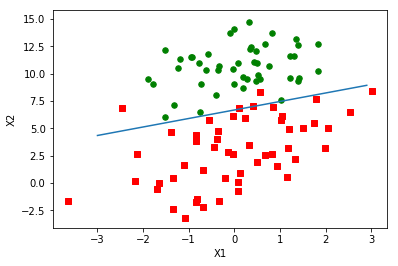

In [101]:
weights = gradAscent(dataMat, labelMat)
plotBestFit(weights.A)

这个分类结果相当不错，从图上看只错分了两到四个点。但是，尽管例子简单且数据集很小，这个方法<font color=blue size=2 face="黑体">**却需要大量的计算**</font>（300次乘法）。因此下一节将对该算法稍作改进，从而使它可以用在真实数据集上。

### 1.2.4 训练算法:随机梯度上升

梯度上升算法在每次更新回归系数时都需要遍历整个数据集，该方法在处理100个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征，那么该方法的计算复杂度就太高了。一种改进方法是一次仅用一个样本点来更新回归系数，该方法称为[**随机梯度上升算法**](https://blog.csdn.net/u011197534/article/details/53492915?utm_source=itdadao&utm_medium=referral)。由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个在线学习算法。与<font color=blue size=2 face="黑体">**“在线学习”**</font>相对应，一次处理所有数据被称作是<font color=blue size=2 face="黑体">**“批处理”**</font>。
<font color=blue size=2 face="黑体">**随机梯度上升算法可以写成如下的伪代码**</font>：  
　所有回归系数初始化为1  
　对数据集中每个样本  
　　计算该样本的梯度  
　　使用`alpha×gradient`更新回归系数值  
　返回回归系数值

In [160]:
# 随机梯度上升算法
def stocGradAscent0(dataMat, classLabels):
    m, n = np.shape(dataMat)
    alpha = 0.01
    weights = np.ones(n)  # initialize to all ones
    #for j in range(200): 可以在整个数据集上迭代200次
    for i in range(m):
        h = sigmoid(sum(dataMat[i]*weights))
        error = classLabels[i] - h
        # 要把dataMat转为数组是因为list乘法[1,2]*2=[1,2,1,2]
        weights = weights + alpha * error * dataMat[i]
    return weights

随机梯度上升算法与梯度上升算法在代码上很相似，但也有一些区别：第一，后者的变量h和误差error都是向量，而<font color=blue size=2 face="黑体">**前者则全是数值**</font>;第二，<font color=blue size=2 face="黑体">**前者没有矩阵的转换过程**</font>，所有变量的数据类型都是NumPy数组

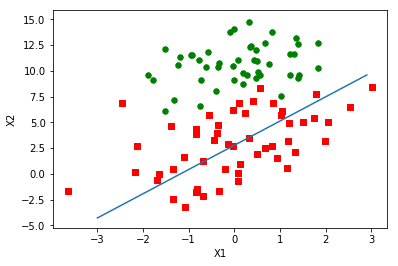

In [161]:
weights = stocGradAscent0(np.array(dataMat), labelMat)
plotBestFit(weights)

拟合出来的直线效果还不错，但并不像梯度上升那么完美。这里的分类器错分了三分之一的样本。直接比较代码结果是不公平的，后者的结果是在整个数据集上迭代了500次才得到的。<font color=blue size=2 face="黑体">**一个判断优化算法优劣的可靠方法是看它是否收敛**</font>，也就是说参数是否达到了稳定值，是否还会不断地变化？

<center>
    <img src="./images/图5-6 运行随机梯度上升，在数据集的一次遍历中回归系数与迭代次数的关系.jpg" height='40%' width="40%">
    <br>
    <div style="color:orange; border-bottom: 0.5px solid #d9d9d9;
    display: inline-block;
    color: #999;
    padding: 0.5px;">运行随机梯度上升，在数据集的一次遍历中回归系数与迭代次数的关系</div>
</center>

随机梯度上升算法在200次(整个数据集上，数据集100个样本)迭代过程中回归系数的变化情况。其中的系数2，也就是X2只经过了50次迭代就达到了稳定值，但系数1和0则需要更多次的迭代。另外值得注意的是，在大的波动停止后，还有一些<font color=blue size=2 face="黑体">**小的周期性波动。不难理解，产生这种现象的原因是存在一些不能正确分类的样本点(数据集并非线性可分)**</font>，在每次迭代时会引发系数的剧烈改变。我们<font color=blue size=2 face="黑体">**期望算法能避免来回波动，从而收敛到某个值。另外，收敛速度也需要加快**</font>。

In [278]:
# 改进的随机梯度上升算法
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)  # initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))  # python3中range不返回数组对象，而是返回range对象
        for i in range(m):
            # ❶alpha decreases with iteration
            alpha = 4/(1.0+j+i)+0.0001
            # 随机选取更新
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

步长alpha每次迭代时都会调整，可以<font color=blue size=2 face="黑体">**缓解数据波动或者高频扰动**</font>。且alpha会随着迭代次数不断减小，但永远不会减小到0（常数项）——可以保证多次迭代后新数据仍然有影响。如果要处理的问题是动态变化的，可以适当加大常数项，确保新值获得更大的回归系数。当(j << max(i))时，步长alpha不是严格下降的。避免参数严格下降也常见于模拟退火等其他优化算法中。  
随机选取样本值来更新回归系数。这种方法将减少周期性的波动——具体实现方法：每次随机从样本中选出一个值，更新回归系数后将其删除，再进行下一次迭代。

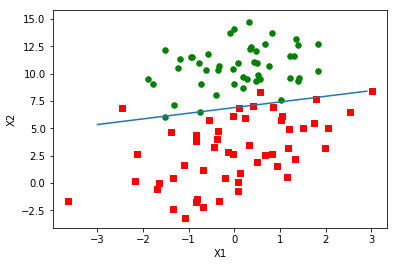

In [283]:
weights = stocGradAscent1(np.array(dataMat), labelMat, 20)
plotBestFit(weights)

该分隔线达到了与GradientAscent()差不多的效果，但是所使用的计算量更少。

<center>
    <img src="./images/图5-7 样本随机选择和alpha动态减少机制的随机梯度上升.jpg" height='40%' width="40%">
    <br>
    <div style="color:orange; border-bottom: 0.5px solid #d9d9d9;
    display: inline-block;
    color: #999;
    padding: 0.5px;">样本随机选择和alpha动态减少机制的随机梯度上升</div>
</center>

第一点，<font color=blue size=2 face="黑体">**没有出现周期性的波动**</font>，这归功于stocGradAscent1()里的样本随机选择机制;第二点是，水平轴比图5-6短了很多，这是由于stocGradAscent1()可以<font color=blue size=2 face="黑体">**收敛得更快**</font>。这次我们仅仅对数据集做了20次遍历，而之前的方法是500次。

目前，已经学习了几个优化算法，但还有很多优化算法值得探讨，所幸这方面已有大量的文献可供参考。另外再说明一下，针对给定的数据集，读者完全<font color=blue size=2 face="黑体">**可以对算法的各种参数进行调整，从而达到更好的效果**</font>。  
迄今为止我们分析了回归系数的变化情况，但还没有达到本章的最终目标，即完成具体的分类任务。下一节将使用随机梯度上升算法来解决病马的生死预测问题

## 1.3 示例:从疝气病症预测病马的死亡率

使用Logistic回归来预测患有疝病的马的存活问题。这里的数据包含368个样本和28个特征。疝病是描述马胃肠痛的术语。

|示例：使用Logistic回归估计马疝病的死亡率||
|:-|:-|
|收集数据|给定数据文件|
|准备数据|用Python解析文本文件并填充缺失值|
|分析数据|可视化并观察数据|
|训练算法|使用优化算法，找到最佳的系数|
|测试算法|为了量化回归的效果，需要观察错误率。根据错误率决定是否回退到训练阶段，通过改变迭代的次数和步长等参数来得到更好的回归系数|
|使用算法|实现一个简单的命令行程序来收集马的症状并输出预测结果并非难事|

除了部分指标主观和难以测量之外，该数据集还存在一个问题，数据集中有<font color=blue size=2 face="黑体">**30%的数据值是缺失的**</font>。下面将首先介绍如何处理数据集中的数据缺失问题，然后再利用Logistic回归和随机梯度上升算法来预测病马的生死。

### 1.3.1 准备数据：处理数据中的缺失值

数据中的缺失值是个非常棘手的问题，有很多文献都致力于解决这个问题。因为有时候数据相当昂贵，扔掉和重新获取都是不可取的，所以必须采用一些方法来解决这个问题。<font color=blue size=2 face="黑体">**下面给出了一些可选的做法**</font>：  
使用可用特征的均值来填补缺失值;  
使用特殊值来填补缺失值，如-1;  
忽略有缺失值的样本;  
使用相似样本的均值添补缺失值;  
使用另外的机器学习算法预测缺失值。  
现在，<font color=blue size=2 face="黑体">**对数据集进行预处理**</font>，使其可以顺利地使用分类算法：  
**第一**，所有的缺失值必须用一个实数值来替换，这里选择实数0来替换所有缺失值，恰好能适用于Logistic回归。原因在于，我们需要的是一个在更新时不会影响系数的值。回归系数的更新公式如下：
$$weights = weights+ alpha * error * dataMatrix[randIndex]$$
如果dataMatrix的某特征对应值为0，那么该特征的系数将不做更新，即：
$$weights = weights$$
另外，由于sigmoid(0)=0.5，即它对结果的预测不具有任何倾向性，因此上述做法也不会对误差项造成任何影响。基于上述原因，将缺失值用0代替既可以保留现有数据，也不需要对优化算法进行修改。此外，该数据集中的特征取值一般不为0，因此在某种意义上说它也满足“特殊值”这个要求。  
**第二**，如果在测试数据集中<font color=blue size=2 face="黑体">**发现了一条数据的类别标签已经缺失**</font>，那么我们的简单做法是将该条数据丢弃。这是因为类别标签与特征不同，很难确定采用某个合适的值来替换。采用Logistic回归进行分类时这种做法是合理的，而如果采用类似kNN的方法就可能不太可行。  
现在我们有一个“干净”可用的数据集和一个不错的优化算法，下面将把这些部分融合在一起训练出一个分类器，然后利用该分类器来预测病马的生死问题。

### 1.3.2 测试算法：用Logistic回归进行分类

使用Logistic回归方法进行分类并不需要做很多工作，所需做的只是把测试集上每个特征向量乘以最优化方法得来的回归系数，再将该乘积结果求和，最后输入到Sigmoid函数中即可。如果对应的Sigmoid值大于0.5就预测类别标签为1，否则为0。

In [289]:
# logistic回归分类函数
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0


def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print("the error rate of this test is: %f" % errorRate)
    return errorRate


def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" %
          (numTests, errorSum/float(numTests)))

classifyVector()，它以回归系数和特征向量作为输入来计算对应的Sigmoid值。如果Sigmoid值大于0.5函数返回1，否则返回0。  
colicTest()，是用于打开测试集和训练集，并对数据进行格式化处理的函数。数据导入之后，便可以使用函数stocGradAscent1()来计算回归系数向量。这里可以自由设定迭代的次数。在系数计算完成之后，导入测试集并计算分类错误率。整体看来，colicTest()具有完全独立的功能，<font color=blue size=2 face="黑体">**多次运行得到的结果可能稍有不同，因为其中有随机的成分**</font>。如果在stocGradAscent1()函数中回归系数已经完全收敛，那么结果才将是确定的。  
multiTest()，其功能是调用函数colicTest()10次并求结果的平均值。

In [290]:
multiTest()

the error rate of this test is: 0.358209
the error rate of this test is: 0.283582
the error rate of this test is: 0.283582
the error rate of this test is: 0.343284
the error rate of this test is: 0.283582
the error rate of this test is: 0.268657
the error rate of this test is: 0.417910
the error rate of this test is: 0.402985
the error rate of this test is: 0.298507
the error rate of this test is: 0.328358
after 10 iterations the average error rate is: 0.326866


10次迭代之后的平均错误率为32%。事实上，这个结果并不差，因为数据集有30%的数据已经缺失。当然，如果调整colicTest()中的迭代次数和stochGradAscent1()中的步长，平均错误率可以降到20%左右。 

## 1.4 本章小结

Logistic回归的<font color=blue size=2 face="黑体">**目的**</font>是寻找一个非线性函数Sigmoid的最佳拟合参数，求解过程可以由<font color=blue size=2 face="黑体">**最优化算法**</font>来完成。在最优化算法中，最常用的就是梯度上升算法，而梯度上升算法又可以简化为随机梯度上升算法。  
随机梯度上升算法与梯度上升算法的效果相当，但占用更少的计算资源。此外，随机梯度上升是一个在线算法，它可以在新数据到来时就完成参数更新，而不需要重新读取整个数据集来进行批处理运算。  
机器学习的一个重要问题就是如何处理缺失数据。这个问题没有标准答案，取决于实际应用中的需求。现有一些解决方案，每种方案都各有优缺点。